In [5]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt

# Read in Data

In [6]:
train_dset = tf.data.experimental.load('../data/dsets_combined_classes/train_dset-128',(tf.TensorSpec(shape=(None, 300, 171), dtype=tf.float64, name=None),
 tf.TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)))
val_dset = tf.data.experimental.load('../data/dsets_combined_classes/val_dset-128',(tf.TensorSpec(shape=(None, 300, 171), dtype=tf.float64, name=None),
 tf.TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)))
test_dset = tf.data.experimental.load('../data/dsets_combined_classes/test_dset-128',(tf.TensorSpec(shape=(None, 300, 171), dtype=tf.float64, name=None),
 tf.TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)))

In [7]:
y_test = np.concatenate([y for x, y in test_dset], axis=0) # for model evaluation
y_test = [np.where(r==1)[0][0] for r in y_test] # convert from one-hot to integer

# Model

In [10]:
from numpy.random import seed
from tensorflow.random import set_seed
seed(0)
set_seed(0)

num_hidden_units = 256
num_outputs = 6

sequential_model = tf.keras.Sequential([
    tf.keras.Input(shape=(300, 171)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(num_hidden_units,return_sequences=True,kernel_regularizer='l2')),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(num_hidden_units,kernel_regularizer='l2')),
    tf.keras.layers.Dense(num_outputs,activation='softmax')
])

input_layer = tf.keras.Input(shape=(300, 171)) 
model = tf.keras.Model(inputs=input_layer, outputs=sequential_model(input_layer))

opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 300, 171)]        0         
_________________________________________________________________
sequential_2 (Sequential)    (None, 6)                 2454534   
Total params: 2,454,534
Trainable params: 2,454,534
Non-trainable params: 0
_________________________________________________________________


In [11]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=50,restore_best_weights=True)
EPOCHS = 300

history = model.fit(train_dset,epochs=EPOCHS,validation_data = val_dset,callbacks=[es])

Epoch 1/300
11/11 [==============================] - 7s 672ms/step - loss: 20.9526 - accuracy: 0.1849 - val_loss: 20.4567 - val_accuracy: 0.1824
Epoch 2/300
11/11 [==============================] - 6s 547ms/step - loss: 20.0841 - accuracy: 0.1834 - val_loss: 19.6239 - val_accuracy: 0.1765
Epoch 3/300
11/11 [==============================] - 6s 547ms/step - loss: 19.2452 - accuracy: 0.2150 - val_loss: 18.8013 - val_accuracy: 0.1588
Epoch 4/300
11/11 [==============================] - 6s 547ms/step - loss: 18.4380 - accuracy: 0.2399 - val_loss: 18.0139 - val_accuracy: 0.2529
Epoch 5/300
11/11 [==============================] - 6s 546ms/step - loss: 17.6595 - accuracy: 0.2539 - val_loss: 17.2482 - val_accuracy: 0.2765
Epoch 6/300
11/11 [==============================] - 6s 543ms/step - loss: 16.9030 - accuracy: 0.2685 - val_loss: 16.5076 - val_accuracy: 0.3118
Epoch 7/300
11/11 [==============================] - 6s 546ms/step - loss: 16.1719 - accuracy: 0.3089 - val_loss: 15.8126 - val_ac

Epoch 56/300
11/11 [==============================] - 6s 548ms/step - loss: 4.4169 - accuracy: 0.7755 - val_loss: 4.6421 - val_accuracy: 0.7118
Epoch 57/300
11/11 [==============================] - 6s 544ms/step - loss: 4.3341 - accuracy: 0.7946 - val_loss: 4.7835 - val_accuracy: 0.6235
Epoch 58/300
11/11 [==============================] - 6s 548ms/step - loss: 4.2851 - accuracy: 0.7924 - val_loss: 4.5537 - val_accuracy: 0.6882
Epoch 59/300
11/11 [==============================] - 6s 550ms/step - loss: 4.1983 - accuracy: 0.8004 - val_loss: 4.6090 - val_accuracy: 0.6824
Epoch 60/300
11/11 [==============================] - 6s 549ms/step - loss: 4.2656 - accuracy: 0.7564 - val_loss: 4.4275 - val_accuracy: 0.6824
Epoch 61/300
11/11 [==============================] - 6s 546ms/step - loss: 4.1692 - accuracy: 0.7733 - val_loss: 4.4211 - val_accuracy: 0.7000
Epoch 62/300
11/11 [==============================] - 6s 548ms/step - loss: 4.0868 - accuracy: 0.7931 - val_loss: 4.3269 - val_accuracy:

Epoch 113/300
11/11 [==============================] - 6s 548ms/step - loss: 2.5820 - accuracy: 0.9230 - val_loss: 3.0528 - val_accuracy: 0.7824
Epoch 114/300
11/11 [==============================] - 6s 545ms/step - loss: 2.5670 - accuracy: 0.9274 - val_loss: 3.1272 - val_accuracy: 0.7706
Epoch 115/300
11/11 [==============================] - 6s 545ms/step - loss: 2.5378 - accuracy: 0.9274 - val_loss: 3.0551 - val_accuracy: 0.8000
Epoch 116/300
11/11 [==============================] - 6s 542ms/step - loss: 2.5112 - accuracy: 0.9428 - val_loss: 2.9557 - val_accuracy: 0.7529
Epoch 117/300
11/11 [==============================] - 6s 546ms/step - loss: 2.4814 - accuracy: 0.9369 - val_loss: 3.1135 - val_accuracy: 0.7353
Epoch 118/300
11/11 [==============================] - 6s 547ms/step - loss: 3.1141 - accuracy: 0.6911 - val_loss: 3.5075 - val_accuracy: 0.5882
Epoch 119/300
11/11 [==============================] - 6s 547ms/step - loss: 3.2509 - accuracy: 0.6449 - val_loss: 3.5093 - val_ac

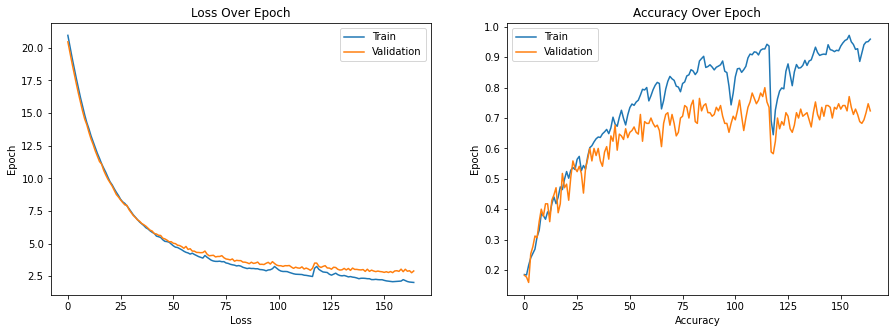

In [14]:
x = np.arange(len(history.history['accuracy']))

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label="Train")
plt.plot(history.history['val_loss'], label="Validation")
plt.title("Loss Over Epoch")
plt.xlabel("Loss")
plt.ylabel("Epoch")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label="Train")
plt.plot(history.history['val_accuracy'], label="Validation")
plt.title("Accuracy Over Epoch")
plt.xlabel("Accuracy")
plt.ylabel("Epoch")
plt.legend()
plt.show()

plt.close()

In [13]:
# test set
(loss,accuracy) = model.evaluate(test_dset)
print('Test accuracy: %.3f' %accuracy)

2/2 [==============================] - 0s 93ms/step - loss: 3.4312 - accuracy: 0.7076
Test accuracy: 0.708


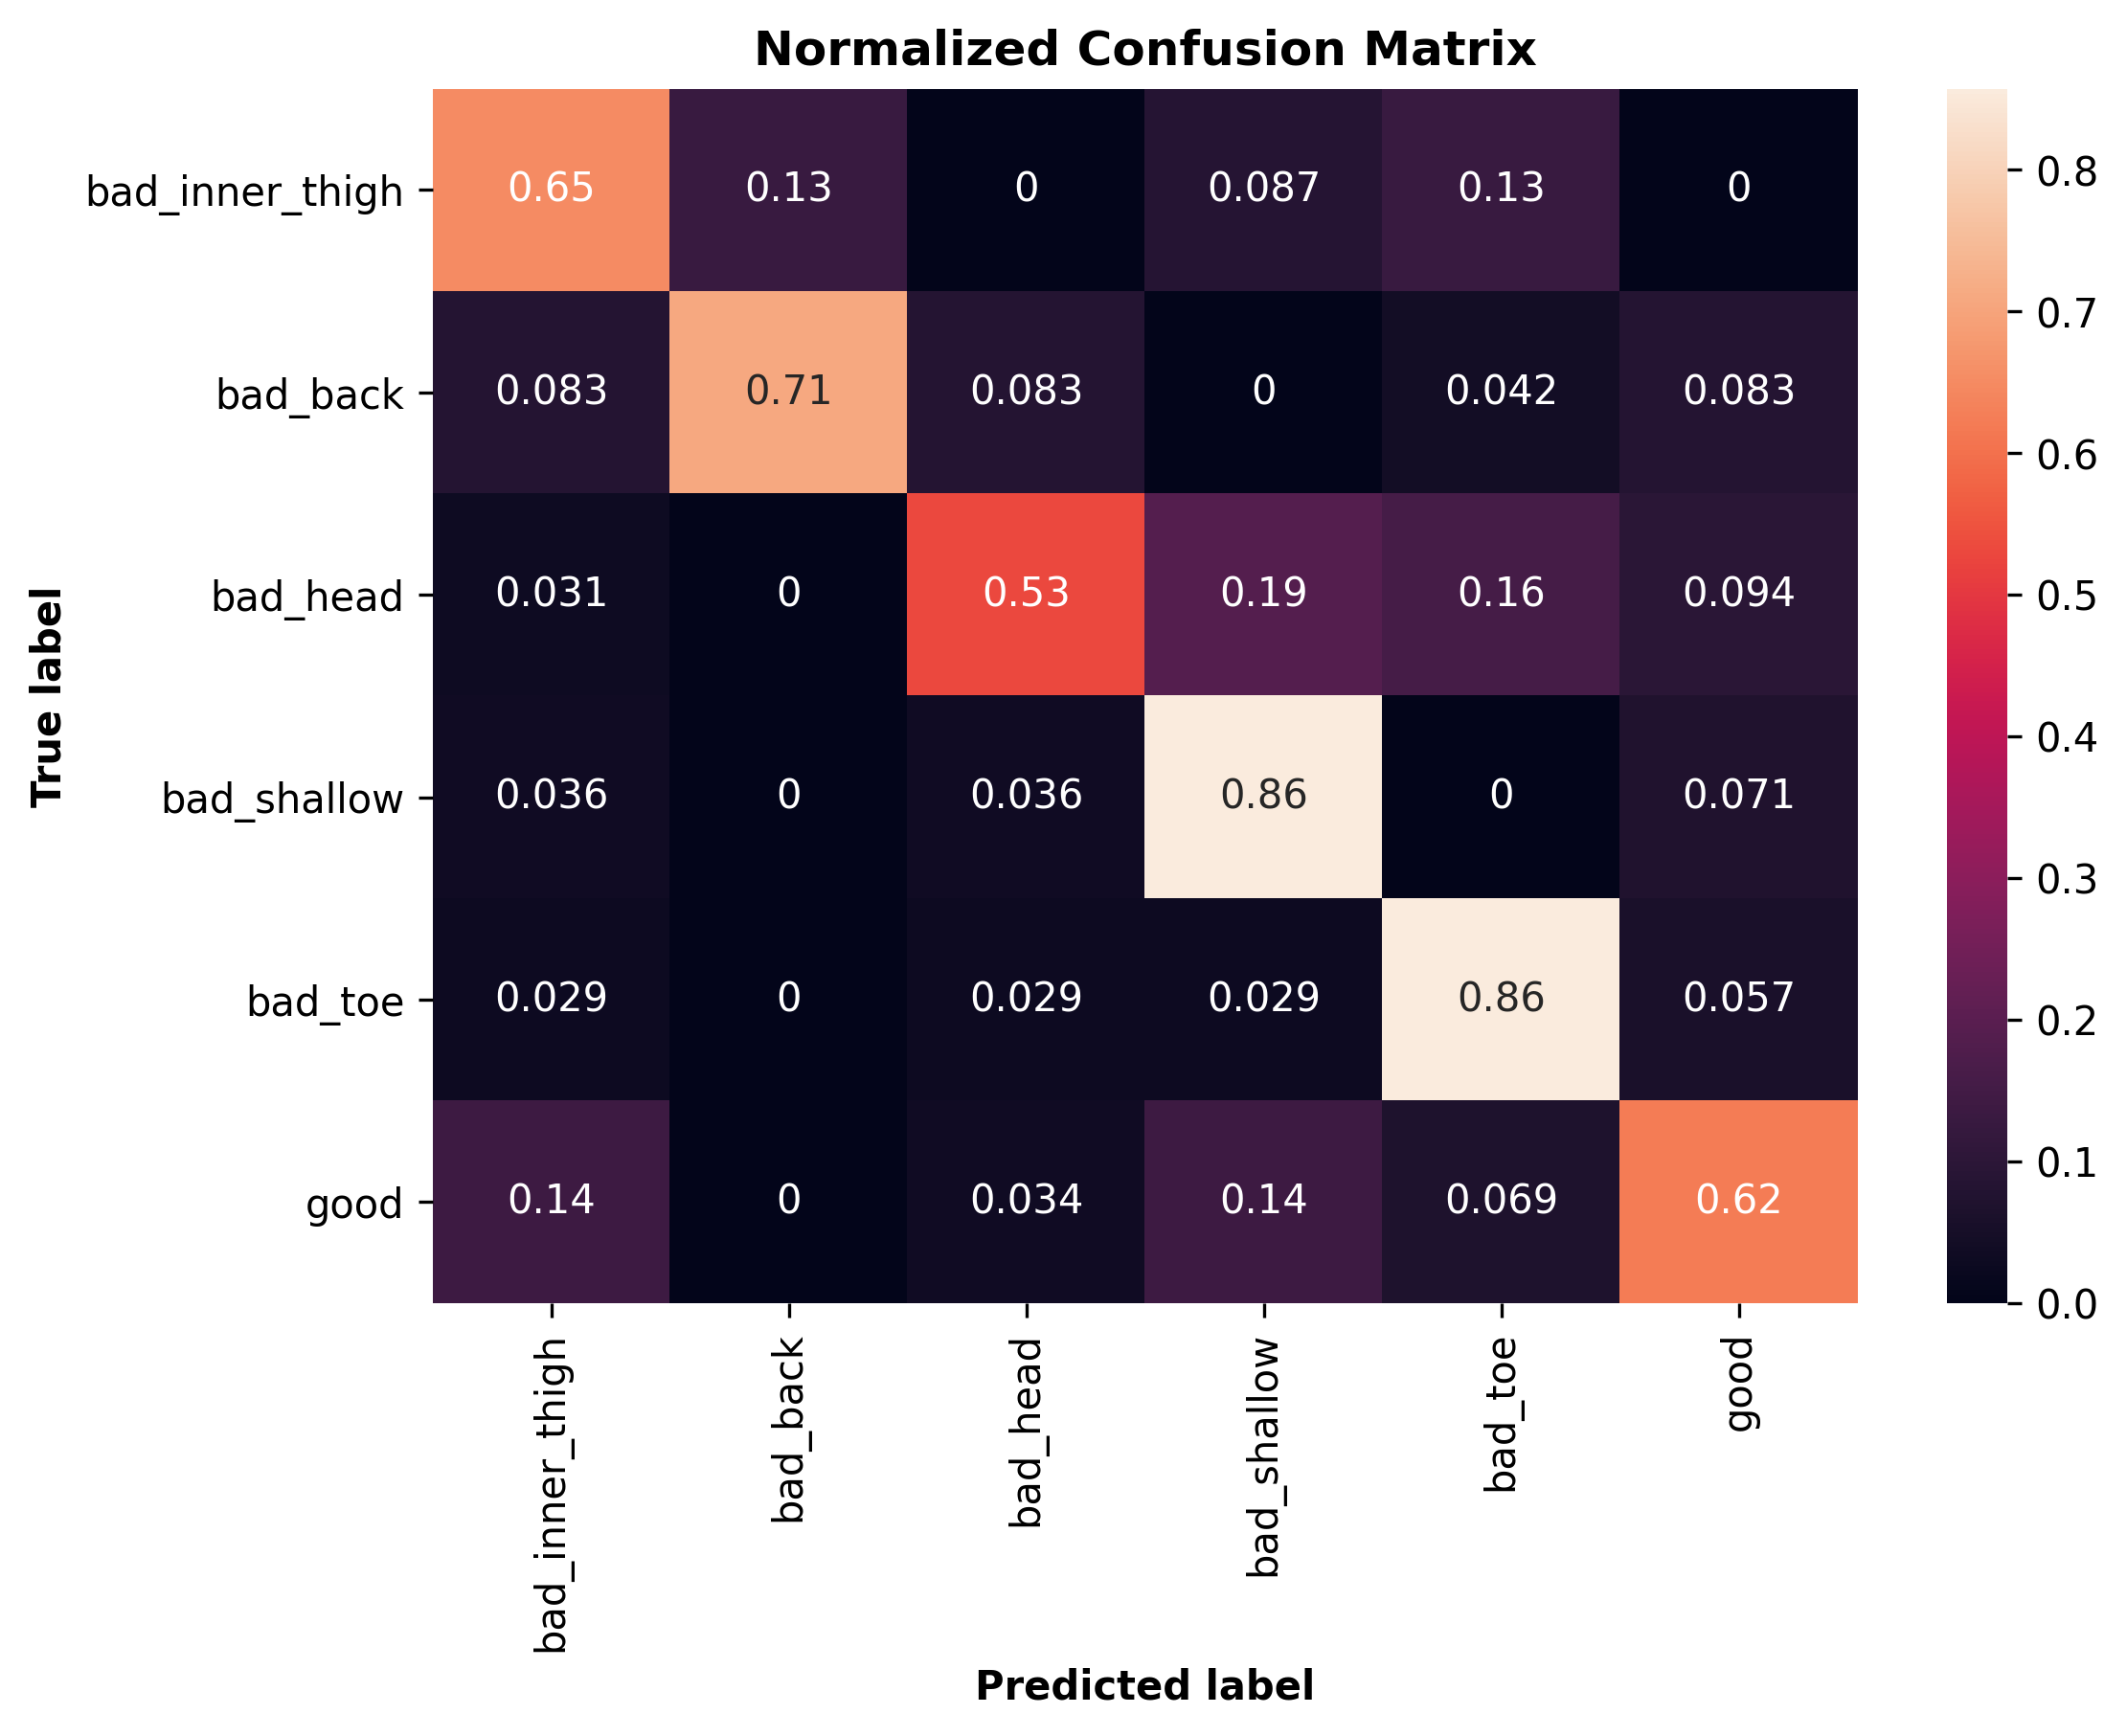


Accuracy: 0.71

Micro Precision: 0.71
Micro Recall: 0.71
Micro F1-score: 0.71

Macro Precision: 0.72
Macro Recall: 0.70
Macro F1-score: 0.70

Weighted Precision: 0.72
Weighted Recall: 0.71
Weighted F1-score: 0.70

Classification Report

                 precision    recall  f1-score   support

bad_inner_thigh       0.62      0.65      0.64        23
       bad_back       0.85      0.71      0.77        24
       bad_head       0.77      0.53      0.63        32
    bad_shallow       0.65      0.86      0.74        28
        bad_toe       0.73      0.86      0.79        35
           good       0.67      0.62      0.64        29

       accuracy                           0.71       171
      macro avg       0.72      0.70      0.70       171
   weighted avg       0.72      0.71      0.70       171

Cohen Kappa Statistic



0.6474372190837492

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import cohen_kappa_score
#Note: good source on the methods below: 
#https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826
#prelim results

#find model predictions
predictions = model.predict(test_dset)
y_pred = np.argmax(predictions, axis=1) #convert those predictions to labels

#confusion matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test,y_pred, normalize = 'true') #true,pred
display_labels = ['bad_inner_thigh', 'bad_back', 'bad_head', 'bad_shallow', 'bad_toe', 'good']

df_cm = pd.DataFrame(cm, index = display_labels, columns = display_labels)
plt.figure(figsize=(8, (7 * 8)/10),dpi=300)
#sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True) # font size #,annot_kws={"size": 16}
plt.ylabel('True label', fontweight = 'bold')
plt.xlabel('Predicted label', fontweight = 'bold')
plt.title('Normalized Confusion Matrix', fontweight = 'bold')
plt.show()

#importing accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))


print('\nClassification Report\n')
classification_rep = classification_report(y_test, y_pred, target_names= display_labels)
print(classification_rep)


#Cohen Kappa Statistic
print('Cohen Kappa Statistic\n')
cohen_kappa_score(y_test, y_pred, labels=None, weights=None, sample_weight=None)